In [ ]:
Makine Öğrenmesi

Gözetimsiz Öğrenme
#Makine öğrenmesi modellerinde, bağımlı değişkenin elimizde olmadığı durumlarda gözlem birimlerinin bir 
#şekilde anlamlı bir hale getirilme çabası olarak nitelendirebiliriz.


In [2]:
!pip install --upgrade matplotlib
!pip install yellowbrick

You should consider upgrading via the 'C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\BÜŞRA\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from yellowbrick.cluster import KElbowVisualizer


In [ ]:
 K-Means
#Temel amaç, gözlemleri birbirine olan benzerliklerini kullanarak kümelere ayırmaktır.


#İşlem adımları:

 #   1. Küme sayısını belirle
  #  2. Rastgele k merkezi seç
   # 3. Her gözlem için k merkezlerine olan uzaklıkları hesapla
    #4. Gözlemleri kendilerine en yakın k merkezine ata
    #5. Atama işleminden sonra oluşan kümeler için tekrar küme merkezi hesapla
    #6. belirlenen iterasyon kadar işlemi tekrarla, küme içi hata değerinin en küçük olduğu durumdaki gözlemlerin 
    #kümelenme yapısını nihai kümelenme olarak seç
    


In [5]:
bg = pd.read_csv("data/homele.csv", sep = ";").copy()
bg.head()

,sex,age_group,type_of_death,2020,2019,2018,2017,2016,2015,2014,2013
0,Males,All ages,Identified deaths,430,497,478,414,414,379,348,360
1,Males,15-19,Identified deaths,2,1,6,2,6,2,5,3
2,Males,20-24,Identified deaths,11,11,16,10,15,16,14,11
3,Males,25-29,Identified deaths,28,26,23,29,29,28,22,22
4,Males,30-34,Identified deaths,37,42,53,42,35,40,38,45


In [6]:
bg.columns= ['cinsiyet', 'yas', 'olum_turu', 'ikibinyirmi', 'ikibinondokuz', 'ikibinonsekiz', 'ikibinonyedi', 'ikibinonalti', 'ikibinonbes','ikibinondort', 'ikibinonuc'] 
bg.head()

,cinsiyet,yas,olum_turu,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,Males,All ages,Identified deaths,430,497,478,414,414,379,348,360
1,Males,15-19,Identified deaths,2,1,6,2,6,2,5,3
2,Males,20-24,Identified deaths,11,11,16,10,15,16,14,11
3,Males,25-29,Identified deaths,28,26,23,29,29,28,22,22
4,Males,30-34,Identified deaths,37,42,53,42,35,40,38,45


In [7]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cols=["cinsiyet", "olum_turu", "yas"]
for i in cols:
    bg[i]=le.fit_transform(bg[i])

In [8]:
bg.head()

,cinsiyet,yas,olum_turu,ikibinyirmi,ikibinondokuz,ikibinonsekiz,ikibinonyedi,ikibinonalti,ikibinonbes,ikibinondort,ikibinonuc
0,1,12,1,430,497,478,414,414,379,348,360
1,1,0,1,2,1,6,2,6,2,5,3
2,1,1,1,11,11,16,10,15,16,14,11
3,1,2,1,28,26,23,29,29,28,22,22
4,1,3,1,37,42,53,42,35,40,38,45


In [9]:
bg.index = bg.iloc[:,0]
bg.index

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='cinsiyet')

In [10]:
bg = bg.iloc[:,1:5]

In [11]:
bg.head()

,yas,olum_turu,ikibinyirmi,ikibinondokuz
cinsiyet,,,,
1,12,1,430,497
1,0,1,2,1
1,1,1,11,11
1,2,1,28,26
1,3,1,37,42


In [12]:
bg.index.name = None
bg.head()

,yas,olum_turu,ikibinyirmi,ikibinondokuz
1,12,1,430,497
1,0,1,2,1
1,1,1,11,11
1,2,1,28,26
1,3,1,37,42


In [13]:
bg.isnull().sum()

yas              0
olum_turu        0
ikibinyirmi      0
ikibinondokuz    0
dtype: int64

In [14]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yas            52 non-null     int32
 1   olum_turu      52 non-null     int32
 2   ikibinyirmi    52 non-null     int64
 3   ikibinondokuz  52 non-null     int64
dtypes: int32(2), int64(2)
memory usage: 1.6 KB


In [15]:
bg.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,52.0,6.000000,3.778162,0.0,3.0,6.0,9.00,12.0
olum_turu,52.0,0.500000,0.504878,0.0,0.0,0.5,1.00,1.0
ikibinyirmi,52.0,45.288462,101.292691,0.0,3.0,13.5,52.75,604.0
ikibinondokuz,52.0,51.557692,115.730826,0.0,6.0,13.0,60.00,687.0


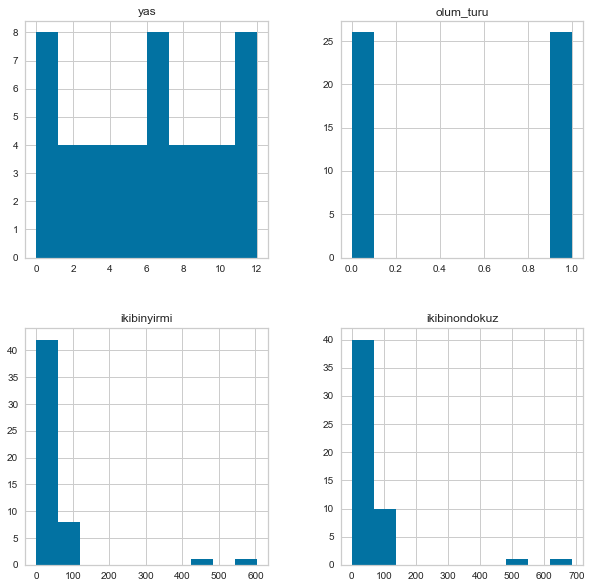

In [16]:
bg.hist(figsize = (10,10));

In [17]:
# K-MEANS Model

In [18]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [19]:
k_fit = kmeans.fit(bg)

In [20]:
k_fit.n_clusters

4

In [21]:
k_fit.cluster_centers_

array([[6.69230769e+00, 4.61538462e-01, 7.22307692e+01, 8.18461538e+01],
       [1.20000000e+01, 0.00000000e+00, 6.04000000e+02, 6.87000000e+02],
       [5.43243243e+00, 5.13513514e-01, 1.03243243e+01, 1.17027027e+01],
       [1.20000000e+01, 1.00000000e+00, 4.30000000e+02, 4.97000000e+02]])

In [22]:
k_fit.labels_

array([3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Görsellestirme

In [24]:
#iki degisken uzerinden gorsellestirme yapalim (2 boyutta veriyi gorebilmek icin)
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(bg)

In [25]:
kumeler = k_fit.labels_

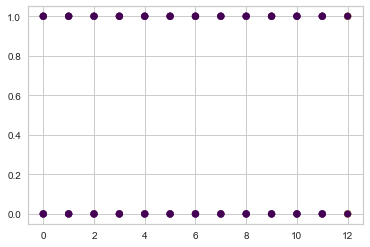

In [26]:
plt.scatter(bg.iloc[:,0], bg.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

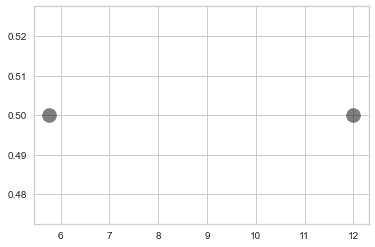

In [27]:
merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

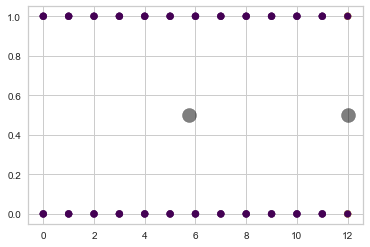

In [28]:
plt.scatter(bg.iloc[:,0], bg.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [30]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(bg)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

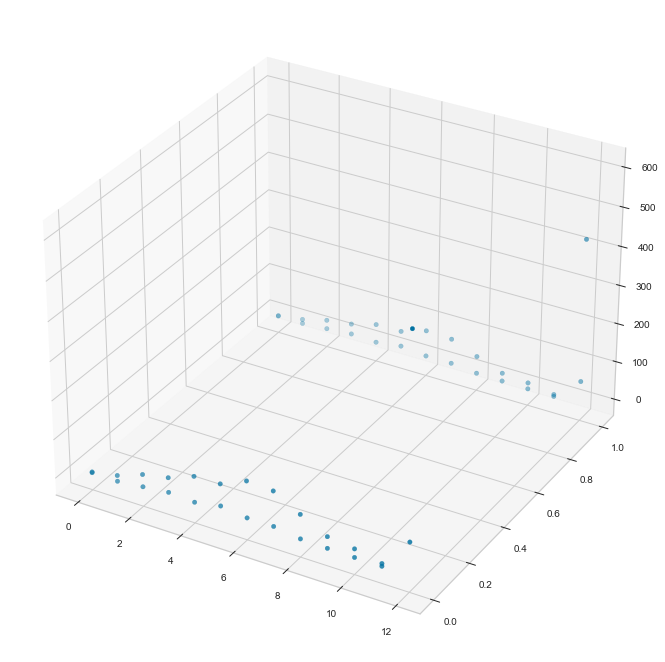

In [31]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(bg.iloc[:, 0], bg.iloc[:, 1], bg.iloc[:, 2]);

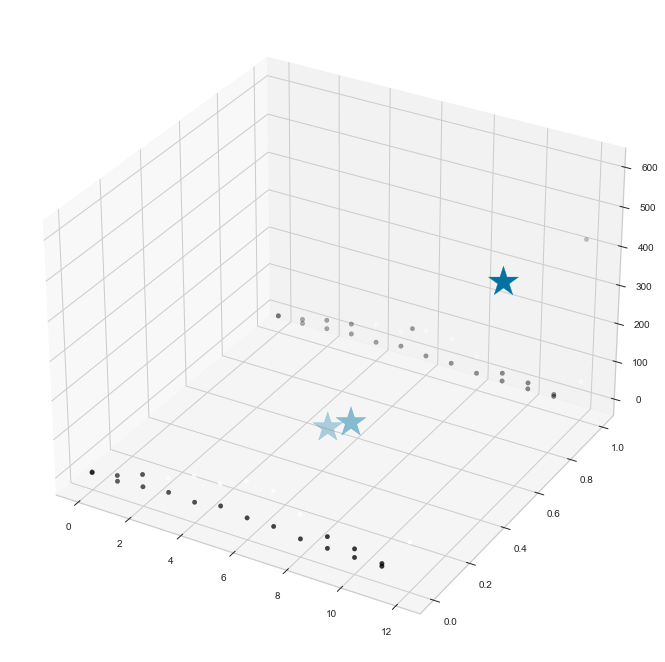

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(bg.iloc[:, 0], bg.iloc[:, 1], bg.iloc[:, 2],  c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           s=1000);


In [ ]:
# Kümeler ve gözlem birimleri

In [33]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(bg)
kumeler = k_fit.labels_

In [37]:
pd.DataFrame({"cinsiyet" : bg.index, "Kumeler": kumeler})[0:50]

,cinsiyet,Kumeler
0,1,1
1,1,2
2,1,2
3,1,2
4,1,2
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [38]:
bg["kume_no"] = kumeler

In [39]:
bg.head()

,yas,olum_turu,ikibinyirmi,ikibinondokuz,kume_no
1,12,1,430,497,1
1,0,1,2,1,2
1,1,1,11,11,2
1,2,1,28,26,2
1,3,1,37,42,2


In [40]:
bg["kume_no"] = bg["kume_no"] + 1

In [41]:
bg.head()

,yas,olum_turu,ikibinyirmi,ikibinondokuz,kume_no
1,12,1,430,497,2
1,0,1,2,1,3
1,1,1,11,11,3
1,2,1,28,26,3
1,3,1,37,42,3
